In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import colorspacious as cs

In [42]:
def lab_to_rgb(L, a, b):
    """
    converts Lab colors to rgb
    """
    lab_color = {'L': L, 'a': a, 'b': b}
    rgb_color = cs.cspace_convert(lab_color, "CAM02-UCS", "sRGB1")
    return rgb_color

In [2]:
measurments = pd.read_csv("data/LabMeasurements-Color-Card.csv", decimal=',', sep=';')
master_colors = pd.read_csv("data/MasterColorCard.csv", decimal=',', sep=';')

# make multilevel index for measurments columns
row = measurments['Row']
col = measurments['Column']
measurments = measurments.drop(['Row', 'Column'], axis=1)
new_cols = pd.MultiIndex.from_tuples(
    [(int(col[1:]), col[0]) for col in measurments.columns]
)
measurments.columns = new_cols
measurments.insert(0, 'Row', row)
measurments.insert(1, 'Column', col)

# make multilevel index for master color rows
master_colors.set_index(['Crow', 'Ccol'], inplace=True)

- 13 color sheets
- each sheet has 42 color cards (7x6)
- each color card has 64 (8x8) color spots

In [32]:
# compute errors
errors = copy(measurments)
for row in range(1,9):
    for col in range(1,9):
        spot = row*10+col

        master_L = master_colors.loc[row, col]['L']
        master_a = master_colors.loc[row, col]['a']
        master_b = master_colors.loc[row, col]['b']

        errors.loc[:, (spot, 'L')] = errors.loc[:, (spot, 'L')] - master_L
        errors.loc[:, (spot, 'a')] = errors.loc[:, (spot, 'a')] - master_a
        errors.loc[:, (spot, 'b')] = errors.loc[:, (spot, 'b')] - master_b

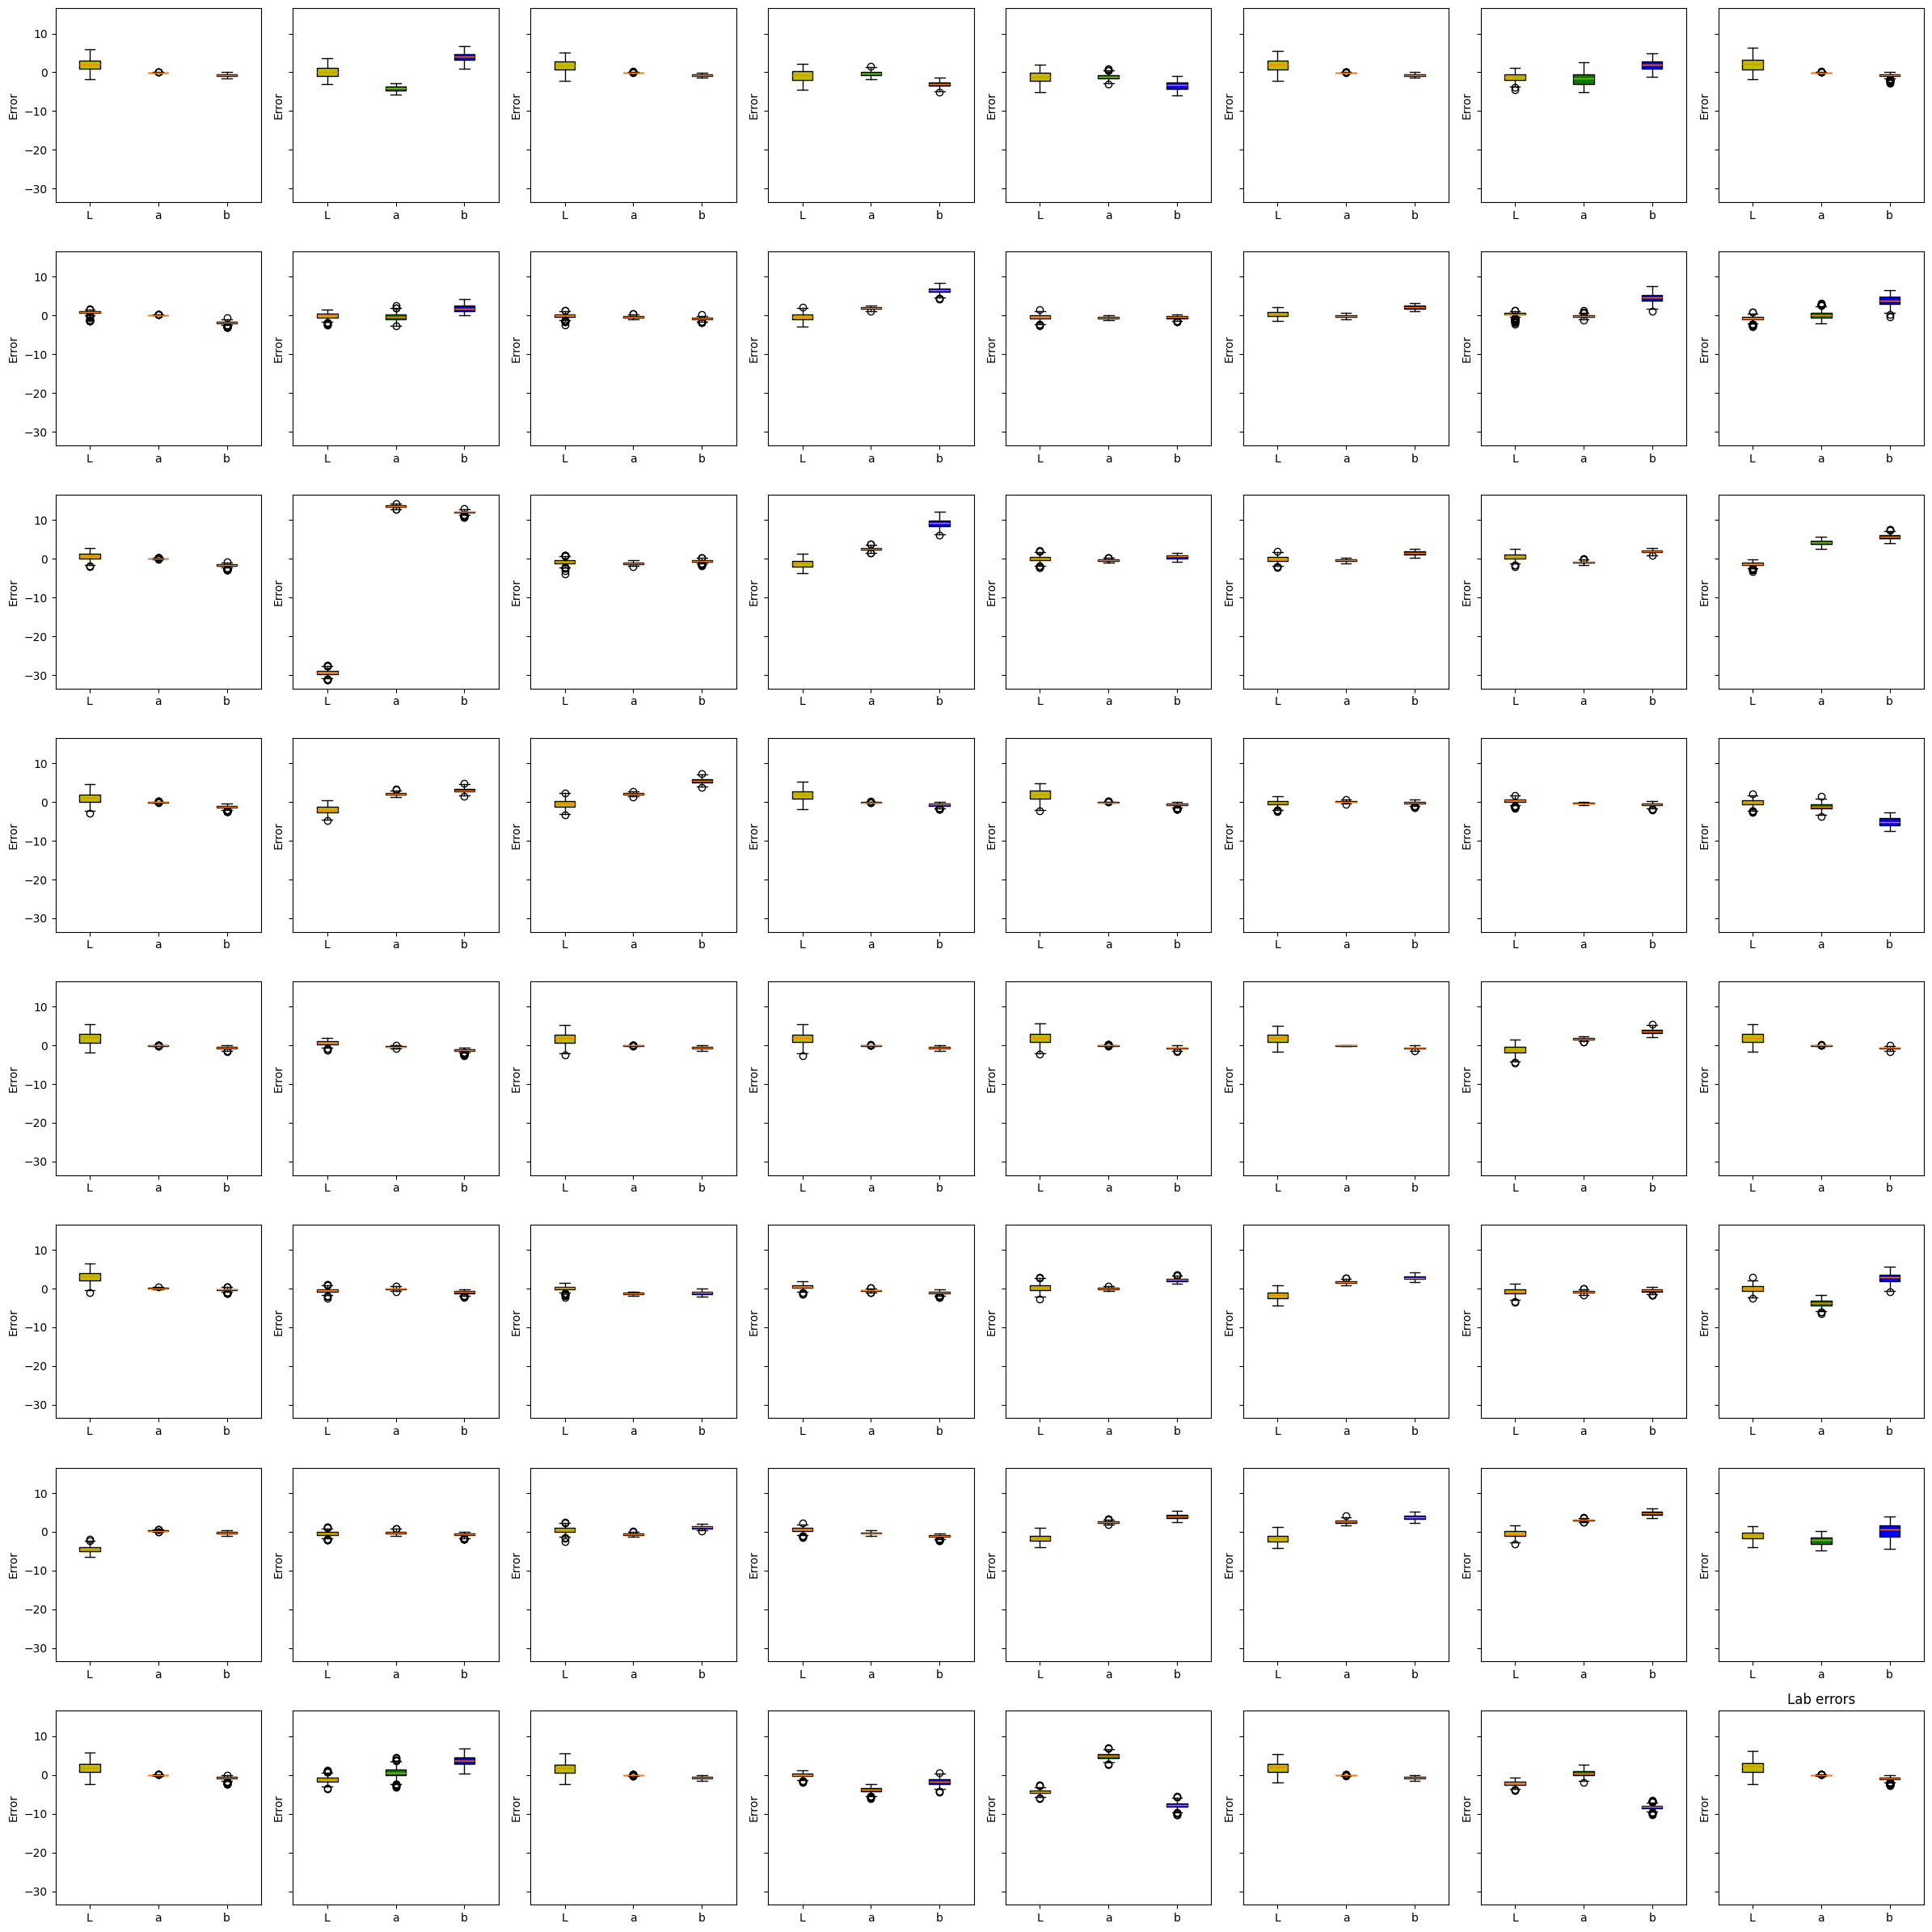

In [62]:
fig, axes = plt.subplots(8,8, figsize=(24,24), sharey=True)

for row in range(1,9):
    for col in range(1,9):
        spot = row*10+col
        L = errors[spot]['L'].values
        a = errors[spot]['a'].values
        b = errors[spot]['b'].values

        ax = axes[row-1, col-1]
        bplt = ax.boxplot([L,a,b], patch_artist=True)

        # add colors
        colors = ['y', 'g', 'b']
        for patch, color in zip(bplt['boxes'], colors):
            patch.set_facecolor(color)

        # format plot
        ax.set_xticks([1,2,3], ['L', 'a', 'b'])
        ax.set_ylabel('Error')
        ax.set_title(f"Spot {spot}")

        #ax.set_ylim([-10.5, 7.7])

plt.title('Lab errors')
plt.tight_layout()